In [1]:
import NetcdfFormatter as net_t
import xarray as xr

In [2]:
temp = net_t.NetcdfFormatter()

In [4]:
temp.clip_region(path = './grace_jpl_mascon.nc', shp_f='./IND/IND_adm0.shp', name='./data/grace')

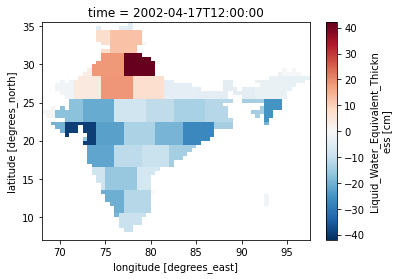

In [4]:
new_nc = xr.open_dataset('./default_clipped.nc')
# new_nc = xr.open_dataset('./grace_jpl_mascon.nc')
# new_nc = xr.open_dataset('./Temp-max-daily.nc')
xr.plot.pcolormesh(new_nc['lwe_thickness'][0,:,:])

# xr.plot.pcolormesh(new_nc['tmax'][0,:,:])

In [2]:
temp = './original/grace_jpl_mascon.nc'

'grace_jpl_mascon'

In [28]:
new_nc

<xarray.Dataset>
Dimensions:  (time: 6575, lat: 31, lon: 31)
Coordinates:
  * lat      (lat) float64 7.5 8.5 9.5 10.5 11.5 ... 33.5 34.5 35.5 36.5 37.5
  * lon      (lon) float64 67.5 68.5 69.5 70.5 71.5 ... 93.5 94.5 95.5 96.5 97.5
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2020-12-31
Data variables:
    tmax     (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2022-09-04 06:10:03.572710 Python
    references:   
    comment:      
    crs:          epsg:4326

In [2]:
temp = net_t.NetcdfFormatter('./grace_gsfz_05.nc')

In [3]:
temp.return_df()

<xarray.Dataset>
Dimensions:        (time: 211, bnds: 2, lat: 64, lon: 64)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-18 2002-05-11 ... 2022-07-17
  * lon            (lon) float64 67.25 67.75 68.25 68.75 ... 97.75 98.25 98.75
  * lat            (lat) float64 7.25 7.75 8.25 8.75 ... 37.25 37.75 38.25 38.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds      (time, bnds, lat, lon) datetime64[ns] ...
    lon_bnds       (lon, bnds, lat) float64 ...
    lat_bnds       (lat, bnds, lon) float64 ...
    land_mask      (lat, lon) float64 ...
    lwe_thickness  (time, lat, lon) float64 ...
Attributes: (12/29)
    CDI:                        Climate Data Interface version 2.0.4 (https:/...
    Conventions:                CF-1.6
    title:                      NASA GSFC GRACE and GRACE-FO MASCON RL06 v1.0
    summary:                    Monthly gravity solutions from GRACE and GRAC...
    platform:                   GRACE and GRACE-FO
    creator_name:               Bryant Loomis
    ...                         ...
    C_20_substitution:          TN-14; Loomis et al., 2020, Geophys. Res. Let...
    C_30_substitution:          TN-14; Loomis et al., 2020, Geophys. Res. Let...
    journal_reference:          Loomis et al. 2019, J. Geod., https://doi.org...
    date_created:               date_stamp
    history:                    Tue Jan 03 00:14:27 2023: cdo remapcon2,grace...
    CDO:                        Climate Data Operators version 2.0.4 (https:/...

In [4]:
import cdo

In [6]:
import platform
import signal
if platform.system() != 'Linux':
    signal.SIGHUP = 1
cdo.debug = True
temp = cdo.Cdo()

In [7]:
from cdo import Cdo

# Initialize the Cdo object
cdo_tool = Cdo()

# Define file paths
input_file = "./data/clipped/chirps-v2.0.monthly._clipped.nc"
output_file = "Temp_nc.nc"
remap_grid = "./data/clipped/grace_jpl_mascon._clipped.nc"

# Define remap options
options = "remapcon2,{} {} {}".format(remap_grid, input_file, output_file)  # Specify both the remap grid and the input file

# Perform remapping
cdo_tool.run(options)  # No need to specify input file here, it's included in the options


'remapcon2,./data/clipped/grace_jpl_mascon._clipped.nc ./data/clipped/chirps-v2.0.monthly._clipped.nc Temp_nc.nc'

In [3]:
test = xr.open_dataset('./test.nc')

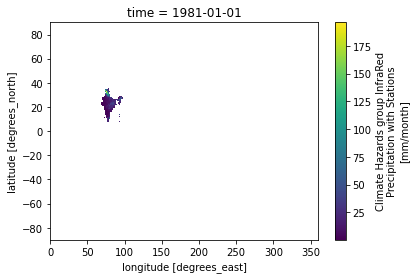

: 

: 

: 

: 

: 

In [4]:
xr.plot.pcolormesh(test['precip'][0, :, :])

In [14]:
test.max()

<xarray.Dataset>
Dimensions:   ()
Data variables:
    lon_bnds  float64 68.5
    lat_bnds  float64 nan
    precip    float64 nan

In [8]:
temp.infov(input = './grace_gsfz_05.nc')

['-1 :       Date     Time   Level Gridsize    Miss :     Minimum        Mean     Maximum : Parameter name',
 '1 : 2002-04-18 00:00:00       0     4096    2974 :      0.0000     0.99643      1.0000 : land_mask',
 '2 : 2002-04-18 00:00:00       0     4096    2974 :     -31.507     -3.9700      27.260 : lwe_thickness',
 '3 : 2002-05-11 00:00:00       0     4096    2974 :     -49.750     -6.2876      30.503 : lwe_thickness',
 '4 : 2002-08-17 00:00:00       0     4096    2974 :     -31.842      9.5143      42.835 : lwe_thickness',
 '5 : 2002-09-16 00:00:00       0     4096    2974 :     -8.4886      13.979      37.691 : lwe_thickness',
 '6 : 2002-10-17 00:00:00       0     4096    2974 :     -13.248      11.996      38.117 : lwe_thickness',
 '7 : 2002-11-16 00:00:00       0     4096    2974 :     -13.874      6.4275      30.894 : lwe_thickness',
 '8 : 2002-12-17 00:00:00       0     4096    2974 :     -14.946     0.54733      28.265 : lwe_thickness',
 '9 : 2003-01-17 00:00:00       0     4